<a href="https://colab.research.google.com/github/thefinancetutor/python-tutorial-colab/blob/main/Lecture_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simulating Stock Prices**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We can use NumPy to generate draws from a probability distribution

In [2]:
np.random.normal()

0.6637760370631107

**A Random Walk Down Python Street**

A random walk is a stochastic process described by $$ x_{t+1} = x_{t} + e_{t+1}. $$

We will assume for the moment that $e$ is normally distributed with mean 0 and standard deviation is 1.

Let's generate a sequence of five random steps

In [3]:
x = np.zeros(5)
x[0] = 0.0
x[1] = x[0] + np.random.normal()
x[2] = x[1] + np.random.normal()
x[3] = x[2] + np.random.normal()
x[4] = x[3] + np.random.normal()
x

array([0.        , 0.37785299, 1.02810445, 2.46546636, 1.80075657])

Now let's make a function to give us $N$ random steps

In [4]:
def get_random_walk(n):
  x = np.zeros(n)
  for i in range(1,n):
    x[i] = x[i-1] + np.random.normal()
  return x

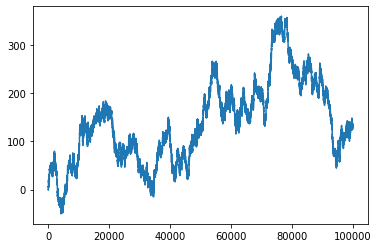

In [5]:
plt.plot(get_random_walk(100000))
plt.show()

This is not a great stock price simulation. Why?

Let's make a better one.

In [6]:
def get_random_price_walk(n):
  x = np.zeros(n)
  x[0]=100
  for i in range(1,n):
    x[i] = x[i-1] + np.random.normal()
  return x

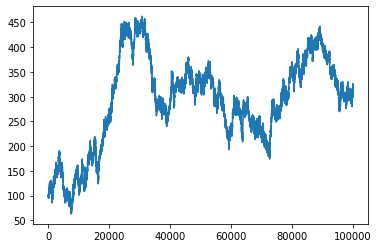

In [7]:
plt.plot(get_random_price_walk(100000))
plt.show()

This is a bit better, but still not great. A mathematician would call this an arithmetic brownian motion.

Let's try again.

In [8]:
def get_geo_price_walk(n):
  x = np.zeros(n)
  x[0]=100
  for i in range(1,n):
    x[i] =x[i-1]*(1+np.random.normal()*.00945)
  return x

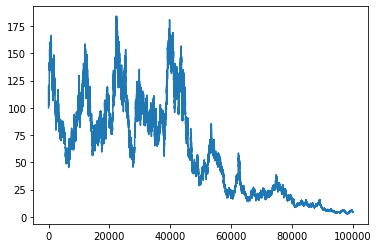

In [9]:
plt.plot(get_geo_price_walk(100000))
plt.show()

This is a geometric brownian motion (with zero drift) and daily standard deviation corresponding to an annual $$15\%$$ Ie, $$.00945= \frac{.15}{\sqrt{252}}$$ Why does it behave this way?


Hint: what is 100000 days in years?

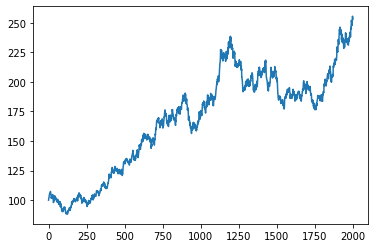

In [10]:
plt.plot(get_geo_price_walk(2000))
plt.show()

That's more like it.

**Analyzing Stock Data**

In [11]:
import pandas as pd
import yfinance as yf
import datetime
from pandas_datareader import data as pdr

tickers = ['AAPL','MSFT','TSLA','SPY']
end = datetime.datetime.today() # Today's date
start = end.replace(year = end.year - 2) # Price history to two years ago from today
data = pdr.get_data_yahoo(tickers, start=start, end=end)['Adj Close']

/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'AAPL', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'MSFT', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'TSLA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'SPY', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


RemoteDataError: ignored

Pandas data reader no longer works, so we need another package.

In [12]:
!pip install yfinance

In [13]:
#initialize empty dataframes
ticker_df = pd.DataFrame()
output_df = pd.DataFrame()

for ticker in tickers:
    close_prices = yf.download(ticker,start=start, end=end)['Adj Close']
    ticker_df[ticker] = close_prices.round(2)
    output_df = output_df.append(ticker_df)

output_df.dropna(0,inplace=True)
output_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,TSLA,SPY
Date,,,,
2019-08-12,49.31,132.85,45.80,278.29
2019-08-13,51.40,135.60,47.00,282.61
2019-08-14,49.87,131.52,43.92,274.26
2019-08-15,49.62,131.22,43.13,274.98
2019-08-16,50.79,133.63,43.99,279.04
...,...,...,...,...
2021-08-03,147.14,287.12,709.74,441.15
2021-08-04,146.73,286.51,710.92,438.98
2021-08-05,146.84,289.52,714.63,441.76


Let's compute returns

In [14]:
ret_df=pd.DataFrame()
ret_df['AAPL']=output_df.AAPL.pct_change()
ret_df['MSFT']=output_df.MSFT.pct_change()
ret_df['TSLA']=output_df.TSLA.pct_change()
ret_df['SPY']=output_df.SPY.pct_change()
ret_df

,AAPL,MSFT,TSLA,SPY
Date,,,,
2019-08-12,NaN,NaN,NaN,NaN
2019-08-13,0.042385,0.020700,0.026201,0.015523
2019-08-14,-0.029767,-0.030088,-0.065532,-0.029546
2019-08-15,-0.005013,-0.002281,-0.017987,0.002625
2019-08-16,0.023579,0.018366,0.019940,0.014765
...,...,...,...,...
2021-08-03,0.012663,0.008075,0.000099,0.008135
2021-08-04,-0.002786,-0.002125,0.001663,-0.004919
2021-08-05,0.000750,0.010506,0.005219,0.006333


Let's plot returns using Matplotlib

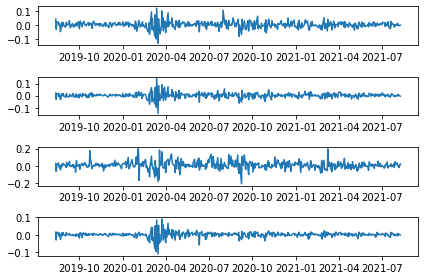

In [15]:
fig, axs = plt.subplots(4)
axs[0].plot(ret_df['AAPL'])
axs[1].plot(ret_df['MSFT'])
axs[2].plot(ret_df['TSLA'])
axs[3].plot(ret_df['SPY'])
plt.tight_layout()
plt.show()

Let's see how this compares to plotting with Pandas

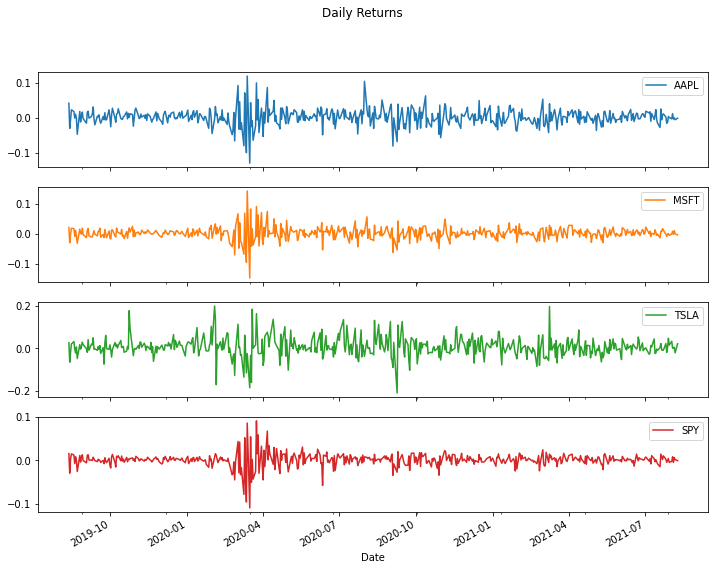

In [16]:
ret_df.plot(title = 'Daily Returns', figsize = (12, 9), subplots = True)
plt.show()

Let's compute some statistics

In [17]:
ret_df.corr()

,AAPL,MSFT,TSLA,SPY
AAPL,1.000000,0.808223,0.466265,0.803853
MSFT,0.808223,1.000000,0.483605,0.854818
TSLA,0.466265,0.483605,1.000000,0.459036
SPY,0.803853,0.854818,0.459036,1.000000


In [18]:
ret_df.std()

AAPL    0.023559
MSFT    0.021414
TSLA    0.046628
SPY     0.015915
dtype: float64

In [19]:
ret_df.mean()

AAPL    0.002443
MSFT    0.001774
TSLA    0.006565
SPY     0.001050
dtype: float64

**Linear Regression**

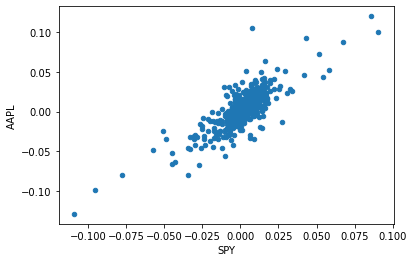

In [20]:
ret_df.dropna(axis=0,inplace=True)
ret_df.plot.scatter('SPY', 'AAPL')
plt.show()



In [21]:
from statsmodels.api import OLS
results=OLS(ret_df['AAPL'],ret_df['SPY']).fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   AAPL   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                              919.9
Date:                Tue, 10 Aug 2021   Prob (F-statistic):                   1.72e-115
Time:                        04:53:35   Log-Likelihood:                          1428.8
No. Observations:                 502   AIC:                                     -2856.
Df Residuals:                     501   BIC:                                     -2851.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SPY            1.1949      0.039     30.331      0.000       1.117       1.272
==============================================================================
Omnibus:                       85.758   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              506.075
Skew:                           0.577   Prob(JB):                    1.28e-110
Kurtosis:                       7.782   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Scikit-Learn is a more powerful package often used for ML applications, but is much less user-friendly

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(ret_df['SPY'],ret_df['AAPL'])
#reg = LinearRegression().fit(ret_df['SPY'].to_numpy().reshape(-1, 1),ret_df['AAPL'].to_numpy().reshape(-1, 1))

ValueError: ignored

Can we get resample the frequency at which we pull data? Yes.

In [23]:
tickers = ['AAPL','MSFT','TSLA','SPY']
end = datetime.datetime.today() # Today's date
start = end.replace(year = end.year - 2) # Price history to two years ago from today

#initialize empty dataframes
ticker_df_m = pd.DataFrame()
output_df_m = pd.DataFrame()

for ticker in tickers:
    close_prices_m = yf.download(ticker,start=start, end=end,interval='1mo')['Adj Close']
    ticker_df_m[ticker] = close_prices_m.round(2)
    output_df_m = output_df_m.append(ticker_df_m)

output_df_m.dropna(0,inplace=True)
output_df_m

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,TSLA,SPY
Date,,,,
2019-09-01,55.09,136.48,48.17,286.69
2019-10-01,61.19,140.74,62.98,294.38
2019-11-01,65.73,148.60,65.99,305.04
2019-12-01,72.44,155.33,83.67,312.37
2020-01-01,76.36,167.67,130.11,313.77
2020-02-01,67.44,159.57,133.60,288.93
2020-03-01,62.88,155.76,104.80,251.38
2020-04-01,72.65,177.00,156.38,284.96
2020-05-01,78.62,180.99,167.00,298.54


Remember how I said that Pandas datareader is broken?

yfinance can fix it

In [24]:
yf.pdr_override()

data = pdr.get_data_yahoo(tickers, start=start, end=end)['Adj Close'].resample('M').ffill()
data

[*********************100%***********************]  4 of 4 completed


,AAPL,MSFT,SPY,TSLA
Date,,,,
2019-08-31,51.342091,135.327377,282.518219,45.122002
2019-09-30,55.088093,136.475876,288.015442,48.174000
2019-10-31,61.185486,140.736130,294.381989,62.984001
2019-11-30,65.930664,149.104645,305.038055,65.987999
2019-12-31,72.443558,155.329636,313.901062,83.666000
2020-01-31,76.356224,167.671310,313.774353,130.113998
2020-02-29,67.598061,160.010727,288.934174,133.598007
2020-03-31,62.882320,155.763794,252.854584,104.800003
2020-04-30,72.652580,176.998489,284.962952,156.376007


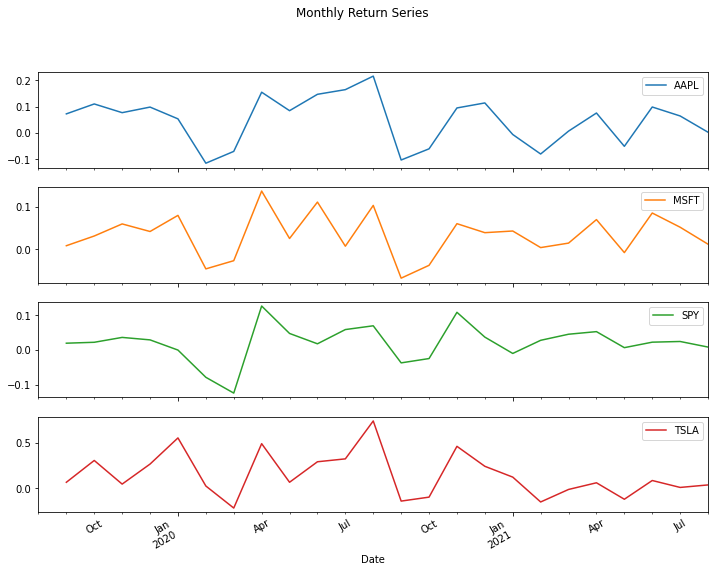

In [27]:
ret_df_m=data.pct_change()
ret_df_m.plot(figsize = (12, 9), subplots = True, title = 'Monthly Return Series')
plt.show()